# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Processing Data 

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape

(34627, 785)

In [4]:
x = np.array(df.drop(['label'], axis=1))
y = np.array(df['label'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15)

In [6]:
x_test.shape                                        # 784 => 28 * 28

(5195, 784)

In [7]:
np.unique(y_train)                                  #Showing Labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [8]:
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']
#index = [ 0,   1,   2,   3,   4,   5,   6,   7,   8,   10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24] 

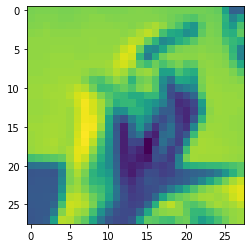

In [9]:
plt.imshow(x_train[45].reshape(28,28))          #Ploling a sample Image 

In [10]:
x_train[45]                                 #Showing a sample array of Image 

array([194, 195, 195, 195, 194, 194, 195, 196, 196, 195, 195, 195, 195,
       196, 197, 196, 195, 194, 193, 193, 193, 192, 192, 191, 188, 155,
       110, 111, 195, 196, 196, 196, 195, 195, 196, 197, 198, 198, 197,
       196, 197, 197, 197, 197, 197, 195, 192, 189, 185, 182, 190, 192,
       191, 168, 135, 155, 196, 197, 198, 197, 196, 197, 197, 198, 199,
       199, 199, 198, 198, 197, 199, 203, 207, 201, 191, 181, 159, 147,
       183, 194, 192, 165, 150, 180, 198, 199, 200, 199, 199, 199, 199,
       200, 200, 200, 200, 200, 199, 201, 207, 212, 205, 178, 162, 158,
       142, 148, 187, 195, 193, 169, 165, 187, 200, 200, 200, 200, 200,
       200, 200, 200, 201, 200, 200, 200, 203, 211, 210, 191, 169, 138,
       145, 163, 172, 185, 195, 196, 195, 181, 172, 165, 200, 200, 200,
       201, 201, 201, 200, 200, 201, 201, 201, 203, 213, 219, 191, 141,
       137, 158, 184, 194, 196, 197, 198, 197, 196, 191, 170, 135, 200,
       200, 201, 202, 202, 202, 201, 201, 202, 202, 202, 209, 22

In [11]:
# Normalizing Array

x_train = x_train / 255
x_test = x_test / 255

In [12]:
x_train[45]                             #Showing Normalized array of a sample Image 

array([0.76078431, 0.76470588, 0.76470588, 0.76470588, 0.76078431,
       0.76078431, 0.76470588, 0.76862745, 0.76862745, 0.76470588,
       0.76470588, 0.76470588, 0.76470588, 0.76862745, 0.77254902,
       0.76862745, 0.76470588, 0.76078431, 0.75686275, 0.75686275,
       0.75686275, 0.75294118, 0.75294118, 0.74901961, 0.7372549 ,
       0.60784314, 0.43137255, 0.43529412, 0.76470588, 0.76862745,
       0.76862745, 0.76862745, 0.76470588, 0.76470588, 0.76862745,
       0.77254902, 0.77647059, 0.77647059, 0.77254902, 0.76862745,
       0.77254902, 0.77254902, 0.77254902, 0.77254902, 0.77254902,
       0.76470588, 0.75294118, 0.74117647, 0.7254902 , 0.71372549,
       0.74509804, 0.75294118, 0.74901961, 0.65882353, 0.52941176,
       0.60784314, 0.76862745, 0.77254902, 0.77647059, 0.77254902,
       0.76862745, 0.77254902, 0.77254902, 0.77647059, 0.78039216,
       0.78039216, 0.78039216, 0.77647059, 0.77647059, 0.77254902,
       0.78039216, 0.79607843, 0.81176471, 0.78823529, 0.74901

In [13]:
labels[y_train[45]].upper()             #Showing Label a sample Image

'Y'

# Building Model

In [14]:
# 1st Trail Model

model_1 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation='sigmoid'),
    keras.layers.Dense(50, activation='sigmoid'),
    keras.layers.Dense(25, activation='sigmoid')
])

model_1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

model_1.fit(x_train, y_train, epochs=10)

Epoch 1/10
920/920 [==============================] - 3s 2ms/step - loss: 2.5220 - accuracy: 0.2685
Epoch 2/10
920/920 [==============================] - 2s 2ms/step - loss: 1.5243 - accuracy: 0.5462
Epoch 3/10
920/920 [==============================] - 2s 2ms/step - loss: 1.1099 - accuracy: 0.6647
Epoch 4/10
920/920 [==============================] - 2s 2ms/step - loss: 0.8613 - accuracy: 0.7378
Epoch 5/10
920/920 [==============================] - 2s 2ms/step - loss: 0.6807 - accuracy: 0.8001
Epoch 6/10
920/920 [==============================] - 2s 2ms/step - loss: 0.5436 - accuracy: 0.8450
Epoch 7/10
920/920 [==============================] - 2s 2ms/step - loss: 0.4360 - accuracy: 0.8826
Epoch 8/10
920/920 [==============================] - 2s 2ms/step - loss: 0.3409 - accuracy: 0.9131
Epoch 9/10
920/920 [==============================] - 2s 2ms/step - loss: 0.2649 - accuracy: 0.9392
Epoch 10/10
920/920 [==============================] - 2s 2ms/step - loss: 0.1965 - accuracy: 0.9603

In [15]:
# 2nd Trail Model

model_2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation='sigmoid'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='softmax')
])

model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

model_2.fit(x_train, y_train, epochs=10)

Epoch 1/10
920/920 [==============================] - 3s 2ms/step - loss: 2.1217 - accuracy: 0.3610
Epoch 2/10
920/920 [==============================] - 2s 2ms/step - loss: 1.1726 - accuracy: 0.6255
Epoch 3/10
920/920 [==============================] - 2s 2ms/step - loss: 0.8233 - accuracy: 0.7390
Epoch 4/10
920/920 [==============================] - 2s 2ms/step - loss: 0.6263 - accuracy: 0.8013
Epoch 5/10
920/920 [==============================] - 2s 2ms/step - loss: 0.4697 - accuracy: 0.8556
Epoch 6/10
920/920 [==============================] - 2s 2ms/step - loss: 0.3558 - accuracy: 0.8947
Epoch 7/10
920/920 [==============================] - 2s 2ms/step - loss: 0.2739 - accuracy: 0.9205
Epoch 8/10
920/920 [==============================] - 2s 2ms/step - loss: 0.2026 - accuracy: 0.9450
Epoch 9/10
920/920 [==============================] - 2s 2ms/step - loss: 0.1513 - accuracy: 0.9605
Epoch 10/10
920/920 [==============================] - 2s 2ms/step - loss: 0.1183 - accuracy: 0.9710

In [49]:
# Final Model (Accuracy is almost 0.9805 )

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation='sigmoid'),
    keras.layers.Dense(50, activation='gelu'),
    keras.layers.Dense(25, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
920/920 [==============================] - 3s 2ms/step - loss: 2.0452 - accuracy: 0.3816
Epoch 2/10
920/920 [==============================] - 2s 2ms/step - loss: 1.0967 - accuracy: 0.6490
Epoch 3/10
920/920 [==============================] - 2s 2ms/step - loss: 0.7665 - accuracy: 0.7548
Epoch 4/10
920/920 [==============================] - 2s 2ms/step - loss: 0.5553 - accuracy: 0.8303
Epoch 5/10
920/920 [==============================] - 2s 2ms/step - loss: 0.4009 - accuracy: 0.8795
Epoch 6/10
920/920 [==============================] - 2s 2ms/step - loss: 0.2989 - accuracy: 0.9136
Epoch 7/10
920/920 [==============================] - 2s 2ms/step - loss: 0.2117 - accuracy: 0.9430
Epoch 8/10
920/920 [==============================] - 2s 2ms/step - loss: 0.1595 - accuracy: 0.9573
Epoch 9/10
920/920 [==============================] - 2s 2ms/step - loss: 0.1118 - accuracy: 0.9736
Epoch 10/10
920/920 [==============================] - 2s 2ms/step - loss: 0.0873 - accuracy: 0.9805

# Testing Model

In [50]:
model.evaluate(x_test, y_test)

163/163 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9831


[0.08499734848737717, 0.9830606579780579]

In [59]:
y_predicted = model.predict(x_test)                         # Prediction According to Test Dataset

163/163 [==============================] - 0s 2ms/step


In [60]:
y_predicted[3]                                              # Prediction of 4th(index-3) Array of Test Dataset

array([3.9190135e-15, 9.5368415e-26, 4.6905912e-10, 5.9895768e-08,
       1.7713754e-17, 9.0825007e-11, 8.9557259e-04, 9.9817729e-01,
       3.2638873e-05, 1.9835281e-10, 1.6236334e-10, 4.6436526e-06,
       2.2187918e-13, 1.2822486e-13, 6.3660969e-13, 3.9510172e-07,
       6.3794287e-10, 2.5762075e-08, 8.6716419e-11, 7.8290096e-04,
       1.1705548e-14, 4.1793178e-06, 6.0844157e-17, 6.9713511e-05,
       3.2646778e-05], dtype=float32)

In [61]:
np.argmax(y_predicted[3])                                   # Predicted Label of 4th(index-3) Array of Test Dataset

7

In [62]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]                                      # First 5 Predicted Labels

[18, 7, 3, 7, 22]

In [63]:
y_test[:5]                                                  # First 5 Actual Labels

array([18,  7,  3,  7, 22], dtype=int64)

In [64]:
# Showing Confution Matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)     # Actual Labels X Predicted Labels
cm

<tf.Tensor: shape=(25, 25), dtype=int32, numpy=
array([[222,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 224,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 219,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 228,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 216,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 194,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 222,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,

Text(114.0, 0.5, 'Truth')

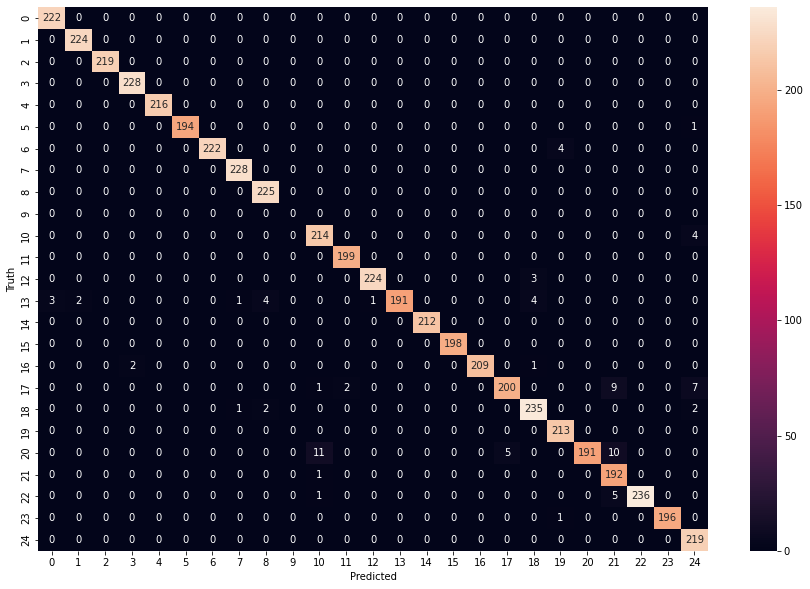

In [65]:
#Showing Hitmap of Confution Matrix

plt.figure(figsize = (15,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')